In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
#import datetime
import re

In [86]:
from sklearn.model_selection import train_test_split
>>> from sklearn import datasets
>>> from sklearn import svm

In [89]:
from sklearn.model_selection import cross_val_score

In [96]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [94]:
os.getcwd()

'C:\\Users\\dileep\\AppData\\Local\\Programs\\Python'

In [5]:
#os.chdir('G:\\TMDB\\New folder')

In [58]:
os.getcwd()

'C:\\Users\\dileep\\AppData\\Local\\Programs\\Python'

In [112]:
data=pd.read_csv("D:\\House.csv",header=0, infer_datetime_format=True)

In [114]:
data.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,12/16/2016 17:24,4.216,0.418,234.84,18.4,0,1,17,52.266670
1,12/16/2016 17:25,5.360,0.436,233.63,23.0,0,1,16,72.333336
2,12/16/2016 17:26,5.374,0.498,233.29,23.0,0,2,17,70.566666
3,12/16/2016 17:27,5.388,0.502,233.74,23.0,0,1,17,71.800000
4,12/16/2016 17:28,3.666,0.528,235.68,15.8,0,1,17,43.100000


In [115]:
data.isnull().sum()

datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Sub_metering_4           0
dtype: int64

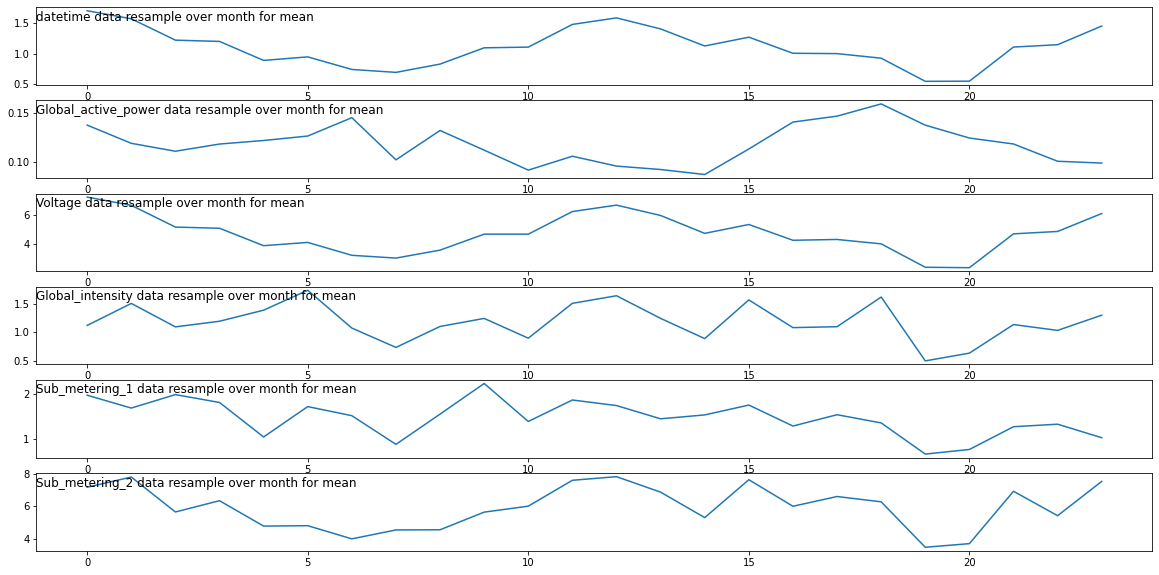

In [69]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(data.resample('M').mean().values[:, col])
    plt.title(data.columns[col] + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()


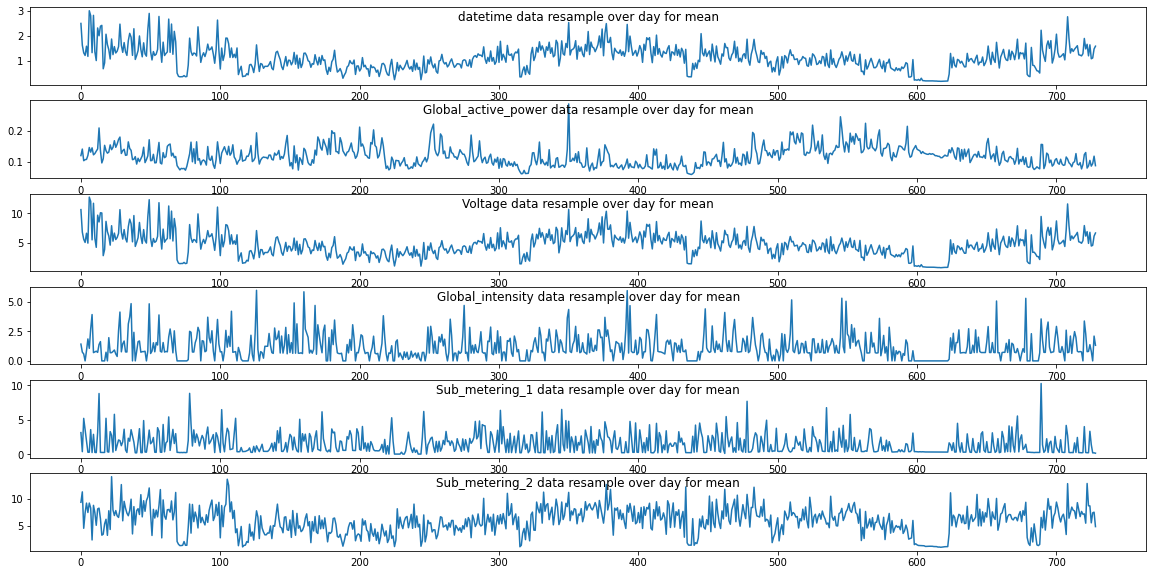

In [70]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(data.resample('D').mean().values[:, col])
    plt.title(data.columns[col] + ' data resample over day for mean', y=0.75, loc='center')
    i += 1
plt.show()

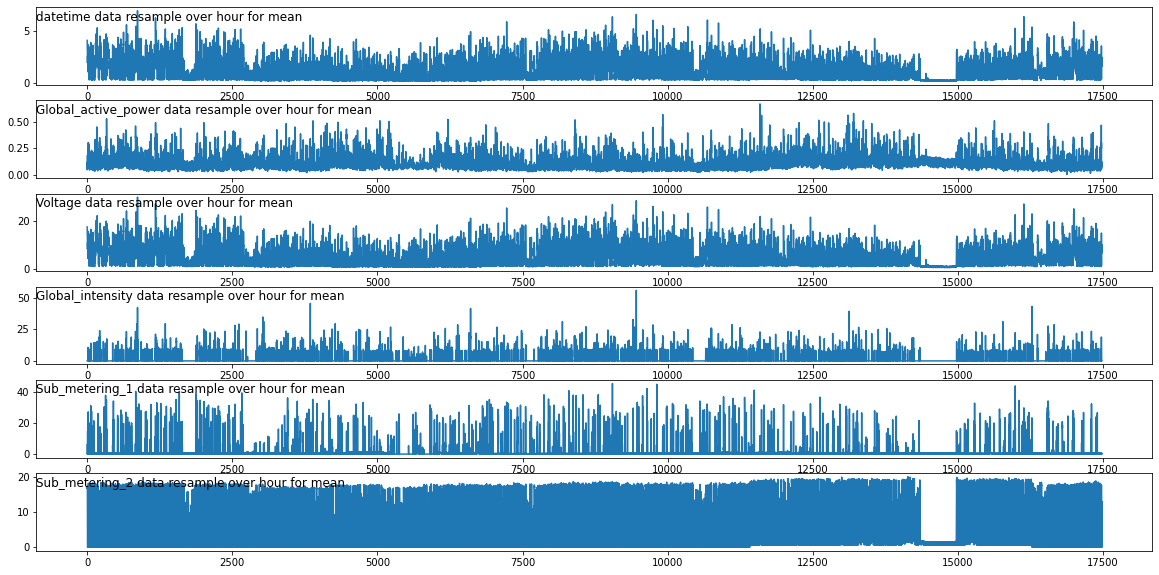

In [71]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(data.resample('H').mean().values[:, col])
    plt.title(data.columns[col] + ' data resample over hour for mean', y=0.75, loc='left')
    i += 1
plt.show()

In [72]:
data.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Global_active_power,1.000000,0.254796,-0.397498,0.999019,0.474427,0.456328,0.624338,0.727423
Global_reactive_power,0.254796,1.000000,-0.119731,0.271808,0.137881,0.150581,0.076027,0.218610
Voltage,-0.397498,-0.119731,1.000000,-0.407832,-0.202951,-0.177261,-0.281990,-0.257233
Global_intensity,0.999019,0.271808,-0.407832,1.000000,0.478509,0.461824,0.613448,0.728379
Sub_metering_1,0.474427,0.137881,-0.202951,0.478509,1.000000,0.060772,0.115728,0.118635
Sub_metering_2,0.456328,0.150581,-0.177261,0.461824,0.060772,1.000000,0.106473,0.091946
Sub_metering_3,0.624338,0.076027,-0.281990,0.613448,0.115728,0.106473,1.000000,0.198936
Sub_metering_4,0.727423,0.218610,-0.257233,0.728379,0.118635,0.091946,0.198936,1.000000


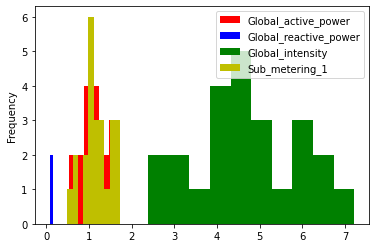

In [80]:
# Below I show hist plot of the mean of different feature resampled over month 
data.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True )
data.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True)
#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
data.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
data.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

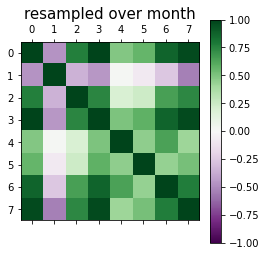

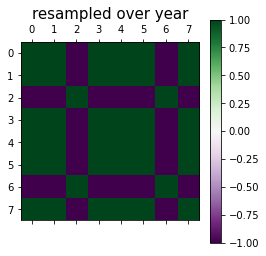

In [123]:
plt.matshow(data.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(data.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()

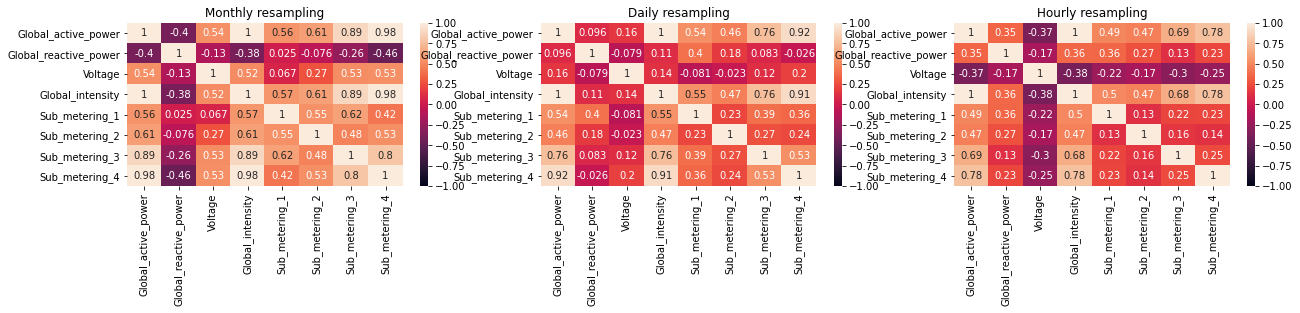

In [73]:
import seaborn as sns
f= plt.figure(figsize=(21,3))

ax=f.add_subplot(131)
dfm = data.resample('M').mean()
sns.heatmap(dfm.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Monthly resampling', size=12)

ax=f.add_subplot(132)
dfd = data.resample('D').mean()
sns.heatmap(dfd.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Daily resampling', size=12)
  
ax=f.add_subplot(133)
dfh = data.resample('H').mean()
sns.heatmap(dfh.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Hourly resampling', size=12)
plt.show()

In [74]:
data = data[['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_2', 'Sub_metering_1','Sub_metering_3']]

In [116]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [81]:

## If you would like to train based on the resampled data (over hour), then used below
values = data_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
0   0.483330   0.067686   0.327267   0.479807   0.036545        0.0   
1   0.469507   0.127856   0.285184   0.465182   0.019934        0.0   
2   0.441451   0.108155   0.404475   0.436495   0.000000        0.0   
3   0.403852   0.084594   0.460913   0.401957   0.012182        0.0   
4   0.261575   0.088656   0.585597   0.263922   0.000000        0.0   

   var7(t-1)   var1(t)  
0   0.840568  0.579920  
1   0.833055  0.483330  
2   0.853088  0.469507  
3   0.738731  0.441451  
4   0.000000  0.403852  


In [82]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(8760, 1, 7) (8760,) (8716, 1, 7) (8716,)


Epoch 1/20
126/126 - 15s - loss: 0.0163 - val_loss: 0.0114
Epoch 2/20
126/126 - 1s - loss: 0.0110 - val_loss: 0.0104
Epoch 3/20
126/126 - 1s - loss: 0.0104 - val_loss: 0.0099
Epoch 4/20
126/126 - 1s - loss: 0.0103 - val_loss: 0.0096
Epoch 5/20
126/126 - 1s - loss: 0.0101 - val_loss: 0.0095
Epoch 6/20
126/126 - 1s - loss: 0.0100 - val_loss: 0.0094
Epoch 7/20
126/126 - 1s - loss: 0.0099 - val_loss: 0.0095
Epoch 8/20
126/126 - 1s - loss: 0.0098 - val_loss: 0.0095
Epoch 9/20
126/126 - 1s - loss: 0.0099 - val_loss: 0.0095
Epoch 10/20
126/126 - 1s - loss: 0.0098 - val_loss: 0.0095
Epoch 11/20
126/126 - 1s - loss: 0.0098 - val_loss: 0.0094
Epoch 12/20
126/126 - 1s - loss: 0.0098 - val_loss: 0.0094
Epoch 13/20
126/126 - 1s - loss: 0.0097 - val_loss: 0.0095
Epoch 14/20
126/126 - 1s - loss: 0.0098 - val_loss: 0.0094
Epoch 15/20
126/126 - 1s - loss: 0.0098 - val_loss: 0.0095
Epoch 16/20
126/126 - 1s - loss: 0.0097 - val_loss: 0.0094
Epoch 17/20
126/126 - 1s - loss: 0.0097 - val_loss: 0.0095
Epoch

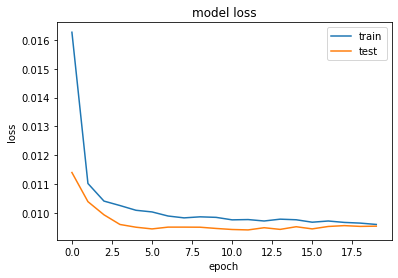

Test RMSE: 0.670


In [99]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [100]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_1,Sub_metering_3
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.106823e+00,1.182593e-01,2.399427e+02,4.712523e+00,1.471446e+00,1.176801e+00,5.925199e+00
std,1.128853e+00,1.094470e-01,3.292354e+00,4.760748e+00,6.341882e+00,6.318931e+00,8.207254e+00
min,7.600000e-02,0.000000e+00,2.234900e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.880000e-01,0.000000e+00,2.379400e+02,1.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.460000e-01,9.800000e-02,2.402000e+02,2.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.544000e+00,1.860000e-01,2.421400e+02,6.400000e+00,1.000000e+00,0.000000e+00,1.700000e+01
max,1.067000e+01,1.390000e+00,2.521400e+02,4.640000e+01,7.800000e+01,8.000000e+01,3.100000e+01


In [119]:
data.index = pd.to_datetime(data.index, unit='m')

In [102]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [104]:
data_resample = data.resample('h').mean() 
data_resample.shape

(17477, 7)

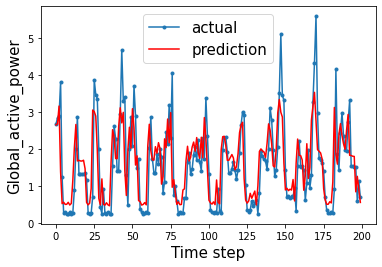

In [105]:
aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [120]:
daily_data=data.resample('M').sum()

In [47]:
#You may save the CSV file according to the days
daily_data.to_csv("household_daily.csv")

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
def forecasts(act,pred):
    scores=[]
    for i in range(act.shape[1]):
        mse=mean_squared_error(act[:,i],pred[:,i])
        rmse=np.sqrt(mse)
        scores.append(rmse)
    s=0
    for row in range(act.shape[0]):
        for col in range(act.shape[1]):
            s+=(act[row,col]-pred[row,col])**2
    score=np.sqrt(s/(act.shape[0]*act.shape[1]))
    return score,scores

In [106]:
def build_model(train,n_input):
    train_x,train_y=to_supervized(train,n_input,7)
    verbose=0
    epochs=70
    batch_size=16
    n_timesteps=train_x.shape[1]
    n_features=train_x.shape[2]
    n_outputs=train_y.shape[1]
    model=Sequential()
    model.add(LSTM(200,activation='relu',input_shape=(n_timesteps,n_features)))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mse',optimizer='adam')
    model.fit(train_x,train_y,epochs=epochs,batch_size=batch_size,verbose=verbose)
    return model

In [107]:
def forecast(model,history,n_input):
    data=np.array(history)
    data=data.reshape((data.shape[0]*data.shape[1],data.shape[2]))
    in_x=data[-n_input:,0]
    in_x=in_x.reshape((1,len(in_x),1))
    yhat=model.predict(in_x,verbose=0)
    return yhat[0]

In [108]:
def evaluate_model(train,test,n_input):
    model=build_model(train,n_input)
    history=[x for x in train]
    prediction=[]
    for i in range(len(test)):
        yhat_s=forecast(model,history,n_input)
        prediction.append(yhat_s)
        history.append(test[i,:])
    prediction=np.array(prediction)
    score,scores=forecasts(test[:,:,0],prediction)
    return score,scores

In [57]:
score,scores=evaluate_model(train,test,14)

In [58]:
summarized_scores('lstm',score,scores)

lstm:[383.337] 376.8, 402.8, 360.6, 383.4, 373.9, 355.9, 425.2


In [59]:
days=['sun','mon','tue','wed','thr','fri','sat']

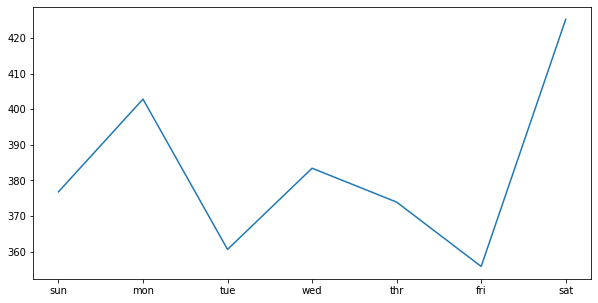

In [60]:
plt.figure(figsize=(10,5))
plt.plot(days,scores)